In [ ]:
! pip install scikit-plot

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

# For supervised
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# For unsupervised learning
# for distance and h-clustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist, squareform

# for kmean, dbscan
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors

# for PCA
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
# for TSNE
from sklearn.manifold import TSNE

import scikitplot as skplt
import warnings; warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('/content/Train.csv')
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


## Data integrity Checking

In [3]:
df.columns = df.columns.str.lower()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               8068 non-null   int64  
 1   gender           8068 non-null   object 
 2   ever_married     7928 non-null   object 
 3   age              8068 non-null   int64  
 4   graduated        7990 non-null   object 
 5   profession       7944 non-null   object 
 6   work_experience  7239 non-null   float64
 7   spending_score   8068 non-null   object 
 8   family_size      7733 non-null   float64
 9   var_1            7992 non-null   object 
 10  segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [5]:
df.isna().sum()

id                   0
gender               0
ever_married       140
age                  0
graduated           78
profession         124
work_experience    829
spending_score       0
family_size        335
var_1               76
segmentation         0
dtype: int64

> **From the box plot shown below, the median of the family size is 3 and there are two outliers. Since the outliers would affect the mean value, it would be reasonable to fill the nan of family size with the column median.**

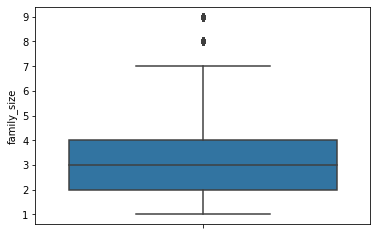

In [6]:
sns.boxplot(y='family_size',data=df)

In [7]:
df.family_size.fillna(df.family_size.median(),inplace=True)

>**It is hard to get the missing profession of an individual based on the information given in this dataset. However, based on my personal experience, people with a profession tends to have work experience and are graduated. So I would fill in the missing in graduated column with Yes and work_experience column with the minimum of the work experience if the individual has a profession. Record will be dropped if the profession is missing(which is only 1.5% of the whole training data).** 

In [8]:
df = df[df.profession.notnull()]

In [9]:
df.graduated.fillna('Yes',inplace=True)

In [10]:
df.work_experience.fillna(0,inplace=True)

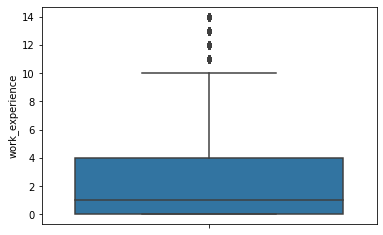

In [11]:
sns.boxplot(y='work_experience',data=df)

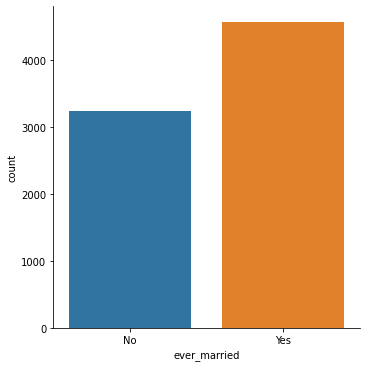

In [12]:
sns.catplot(kind='count',x='ever_married',data=df)

>**For the marital status, there is 136 observations out of 7944 which is only 1% of the current data, and I think it might affect how people choose a product and purchase behavior, so I will only keep those record which has martial status.**

In [13]:
df = df[df.ever_married.notna()]

>**For the var_1, which is an anonymised categories for customers, it has 7 unique observations and has nan values. It is hard to find how this categroies is decided based on. And there is 72 observations has nan in this column, which is 0.92% of the remaining data. To add as less noise as possible, I decided to remove those observations.** 

In [14]:
df.var_1.unique()

array(['Cat_4', 'Cat_6', 'Cat_7', 'Cat_3', 'Cat_1', 'Cat_2', nan, 'Cat_5'],
      dtype=object)

In [15]:
df=df[df.var_1.notna()]

>**After handaling the missing value, I get 7736 observations out of 8068 observations. In other words, I droped around 5 percent of the oraiginal data. I think it is reasonable because we still have as many observations as needed to train the model.**

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7736 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               7736 non-null   int64  
 1   gender           7736 non-null   object 
 2   ever_married     7736 non-null   object 
 3   age              7736 non-null   int64  
 4   graduated        7736 non-null   object 
 5   profession       7736 non-null   object 
 6   work_experience  7736 non-null   float64
 7   spending_score   7736 non-null   object 
 8   family_size      7736 non-null   float64
 9   var_1            7736 non-null   object 
 10  segmentation     7736 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 725.2+ KB


In [17]:
df.isna().sum()

id                 0
gender             0
ever_married       0
age                0
graduated          0
profession         0
work_experience    0
spending_score     0
family_size        0
var_1              0
segmentation       0
dtype: int64

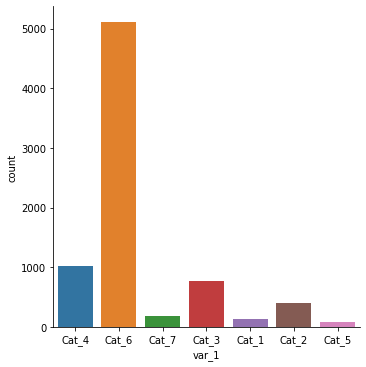

In [18]:
sns.catplot(kind='count',x='var_1',data=df)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7736 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               7736 non-null   int64  
 1   gender           7736 non-null   object 
 2   ever_married     7736 non-null   object 
 3   age              7736 non-null   int64  
 4   graduated        7736 non-null   object 
 5   profession       7736 non-null   object 
 6   work_experience  7736 non-null   float64
 7   spending_score   7736 non-null   object 
 8   family_size      7736 non-null   float64
 9   var_1            7736 non-null   object 
 10  segmentation     7736 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 1.0+ MB


In [20]:
df.isna().sum()

id                 0
gender             0
ever_married       0
age                0
graduated          0
profession         0
work_experience    0
spending_score     0
family_size        0
var_1              0
segmentation       0
dtype: int64

## EDA

>It can be suggested that the company classified their customers into four groups, and group D has the most consumers, and group B has the least consumers. However, the number difference is small and I would see the group is divided relatively evenly.

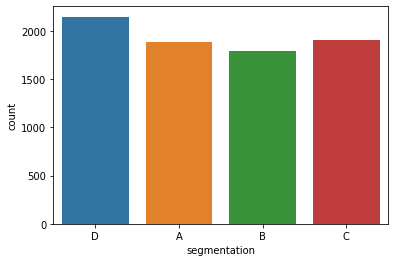

In [21]:
sns.countplot(x='segmentation',data=df)

>Their consumers have 9 professions, which contains healthcare, engineer,lawer, entertainment, artist,executive,doctor, homemaker and marketing. Among these professions, the number of artists is the largest, and the number of homemakers are the smallest. 

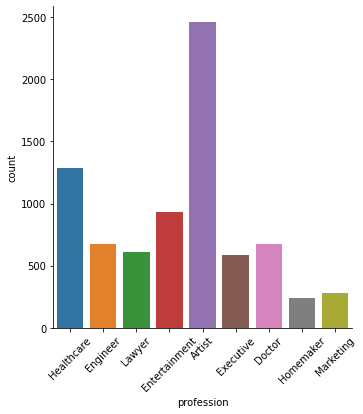

In [22]:
sns.catplot(kind='count',x='profession',data=df).set_xticklabels(rotation=45)

>As I checked the professon distributions among these 4 groups, group D has the most healcare individuals, and group C has the most number of artist. However, for group B and group A, the difference is not big, which may indicate that the company may fail to design the correct number of product based on marketing segmentation.

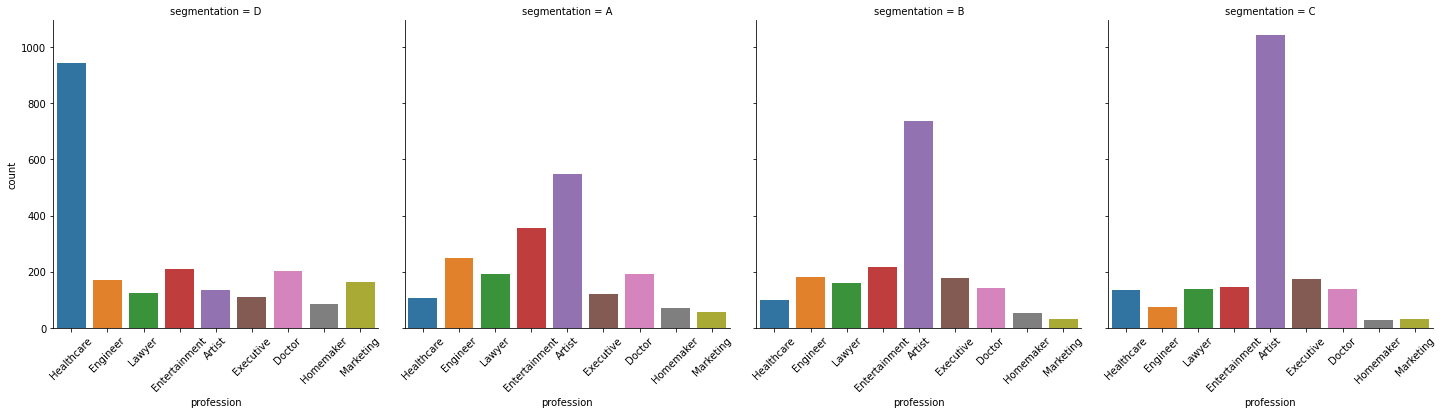

In [23]:
sns.catplot(kind='count',x='profession',col='segmentation',data=df).set_xticklabels(rotation=45)

>The dataset is distributed relatively evenly gender wise. There are more male than female. There are more male in segmentation D, for the other three segmentation, the gender is distributed similar to the trend we see in the whole dataset.Surprisingly, there are more male who has profession related to healthcare than female. And the number of female who is an engineer is larger than those who are male. 

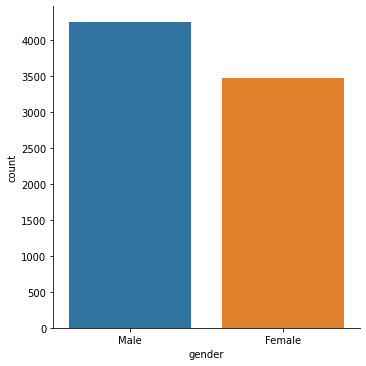

In [24]:
sns.catplot(kind='count',x='gender',data=df)

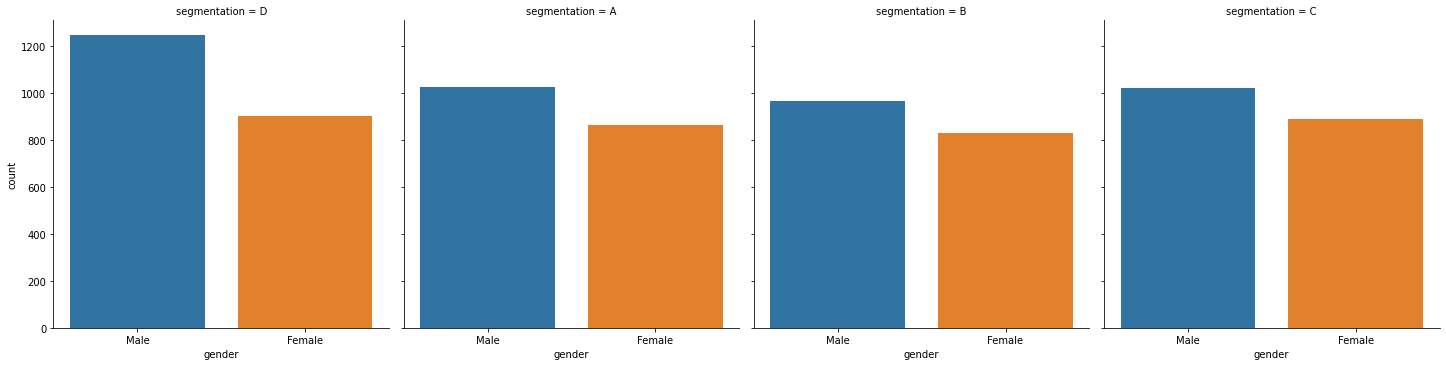

In [25]:
sns.catplot(kind='count',x='gender',data=df,col='segmentation')

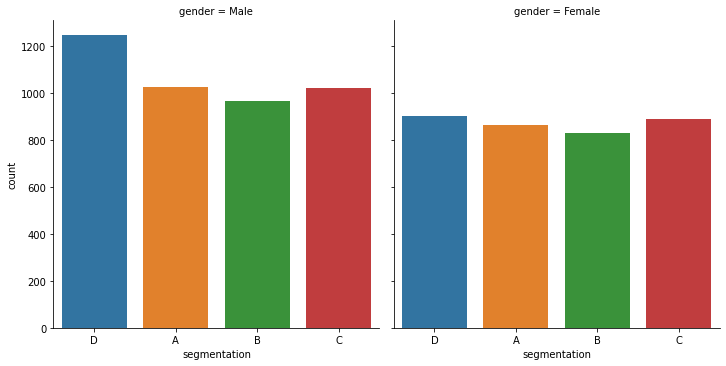

In [26]:
sns.catplot(kind='count',x='segmentation',data=df,col='gender')

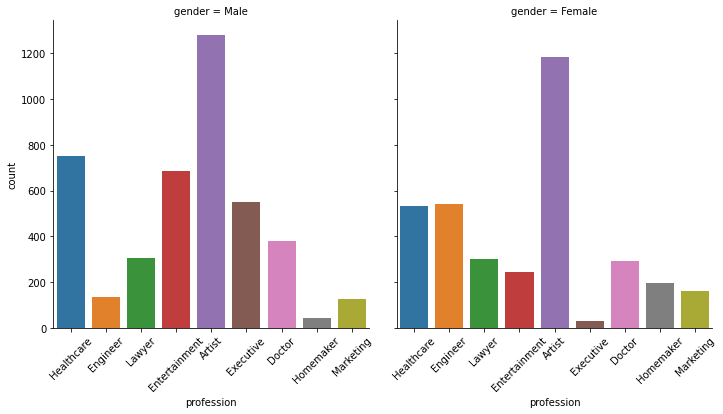

In [27]:
sns.catplot(kind='count',x='profession',data=df,col='gender').set_xticklabels(rotation=45)

>The distribution of age doesn't go with a normal distribution. The peak is around 40. However, it could be identified that for people are relatively yonger in group D compared to people belong to other groups. 

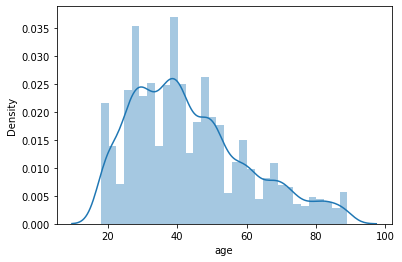

In [28]:
sns.distplot(df['age'])

In [29]:
df.groupby('segmentation')[['age']].mean().sort_values('age',ascending=False)

,age
segmentation,
C,49.306967
B,48.205128
A,44.846847
D,33.280522


## Data paration

In [30]:
df.index = df['id']
df.drop(columns='id',inplace=True)

### for numeric columns

In [31]:
numcol = df.select_dtypes('number')

In [32]:
numcol.describe().T

,count,mean,std,min,25%,50%,75%,max
age,7736.0,43.517709,16.716255,18.0,30.75,40.0,53.0,89.0
work_experience,7736.0,2.377068,3.328766,0.0,0.00,1.0,4.0,14.0
family_size,7736.0,2.854835,1.501560,1.0,2.00,3.0,4.0,9.0


In [33]:
# standardize numberic variables
sc = StandardScaler()
sc = sc.fit(numcol)
scaled = sc.transform(numcol)

In [34]:
num_c = pd.DataFrame(scaled,columns = numcol.columns, index=numcol.index)

In [35]:
num_c.head()

,age,work_experience,family_size
id,,,
462809,-1.287316,-0.413714,0.762700
462643,-0.330102,-0.714145,0.096683
466315,1.404849,-0.413714,-1.235351
461735,1.404849,-0.714145,-0.569334
462669,-0.210450,-0.714145,2.094733


In [36]:
num_c.describe().T

,count,mean,std,min,25%,50%,75%,max
age,7736.0,4.583114e-17,1.000065,-1.526619,-0.763839,-0.210450,0.567286,2.721018
work_experience,7736.0,4.846462e-17,1.000065,-0.714145,-0.714145,-0.413714,0.487579,3.491889
family_size,7736.0,-2.819939e-16,1.000065,-1.235351,-0.569334,0.096683,0.762700,4.092784


### categorical variables

In [37]:
catcol = df[['gender','ever_married','graduated','profession','spending_score','var_1']]

In [38]:
catcol.head(3)

,gender,ever_married,graduated,profession,spending_score,var_1
id,,,,,,
462809,Male,No,No,Healthcare,Low,Cat_4
462643,Female,Yes,Yes,Engineer,Average,Cat_4
466315,Female,Yes,Yes,Engineer,Low,Cat_6


In [39]:
# create dummy variables
c = pd.get_dummies(catcol,drop_first=True)
c.head(3)

,gender_Male,ever_married_Yes,graduated_Yes,profession_Doctor,profession_Engineer,profession_Entertainment,profession_Executive,profession_Healthcare,profession_Homemaker,profession_Lawyer,profession_Marketing,spending_score_High,spending_score_Low,var_1_Cat_2,var_1_Cat_3,var_1_Cat_4,var_1_Cat_5,var_1_Cat_6,var_1_Cat_7
id,,,,,,,,,,,,,,,,,,,
462809,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
462643,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
466315,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [40]:
c.columns

Index(['gender_Male', 'ever_married_Yes', 'graduated_Yes', 'profession_Doctor',
       'profession_Engineer', 'profession_Entertainment',
       'profession_Executive', 'profession_Healthcare', 'profession_Homemaker',
       'profession_Lawyer', 'profession_Marketing', 'spending_score_High',
       'spending_score_Low', 'var_1_Cat_2', 'var_1_Cat_3', 'var_1_Cat_4',
       'var_1_Cat_5', 'var_1_Cat_6', 'var_1_Cat_7'],
      dtype='object')

In [41]:
# combine numerical and categorical columns
sdf = pd.concat([num_c,c],axis=1)

In [42]:
# map segmentation
sdf['segmentation'] = df['segmentation'].map({'A':0,'B':1,'C':2,'D':3})

In [43]:
sdf.head()

,age,work_experience,family_size,gender_Male,ever_married_Yes,graduated_Yes,profession_Doctor,profession_Engineer,profession_Entertainment,profession_Executive,profession_Healthcare,profession_Homemaker,profession_Lawyer,profession_Marketing,spending_score_High,spending_score_Low,var_1_Cat_2,var_1_Cat_3,var_1_Cat_4,var_1_Cat_5,var_1_Cat_6,var_1_Cat_7,segmentation
id,,,,,,,,,,,,,,,,,,,,,,,
462809,-1.287316,-0.413714,0.762700,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,3
462643,-0.330102,-0.714145,0.096683,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
466315,1.404849,-0.413714,-1.235351,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1
461735,1.404849,-0.714145,-0.569334,1,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1
462669,-0.210450,-0.714145,2.094733,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0


## Model development

In [45]:
sdf.columns

Index(['age', 'work_experience', 'family_size', 'gender_Male',
       'ever_married_Yes', 'graduated_Yes', 'profession_Doctor',
       'profession_Engineer', 'profession_Entertainment',
       'profession_Executive', 'profession_Healthcare', 'profession_Homemaker',
       'profession_Lawyer', 'profession_Marketing', 'spending_score_High',
       'spending_score_Low', 'var_1_Cat_2', 'var_1_Cat_3', 'var_1_Cat_4',
       'var_1_Cat_5', 'var_1_Cat_6', 'var_1_Cat_7', 'segmentation'],
      dtype='object')

In [46]:
X = sdf[['age', 'work_experience', 'family_size', 'gender_Male',
       'ever_married_Yes', 'graduated_Yes', 'profession_Doctor',
       'profession_Engineer', 'profession_Entertainment',
       'profession_Executive', 'profession_Healthcare', 'profession_Homemaker',
       'profession_Lawyer', 'profession_Marketing', 'spending_score_High',
       'spending_score_Low', 'var_1_Cat_2', 'var_1_Cat_3', 'var_1_Cat_4',
       'var_1_Cat_5', 'var_1_Cat_6', 'var_1_Cat_7']]
y = sdf['segmentation']

validation_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=validation_size,random_state=0,stratify=y)


In [48]:
def make_cm(matrix, columns):
    n = len(columns)
    act = ['actual Segmentation'] * n
    pred = ['predicted Segmentation'] * n

    cm = pd.DataFrame(matrix, 
        columns=[pred, columns], index=[act, columns])
    return cm

### Supervised Category prediction

#### Model 1: Logistic Regression

In [47]:
model1 = LogisticRegression()
model1.fit(X_train,y_train)

y_pred = model1.predict(X_train)

print('Training Set')
print('-'*50)
print(confusion_matrix(y_train,y_pred))
print(classification_report(y_train,y_pred))

y_val = model1.predict(X_test)
print('Validation Set')
print('-'*50)
print(confusion_matrix(y_train,y_pred))
print(classification_report(y_train,y_pred))

Training Set
--------------------------------------------------
[[ 743  201  282  283]
 [ 410  342  521  162]
 [ 206  193  941  187]
 [ 349   84   77 1207]]
              precision    recall  f1-score   support

           0       0.44      0.49      0.46      1509
           1       0.42      0.24      0.30      1435
           2       0.52      0.62      0.56      1527
           3       0.66      0.70      0.68      1717

    accuracy                           0.52      6188
   macro avg       0.51      0.51      0.50      6188
weighted avg       0.51      0.52      0.51      6188

Validation Set
--------------------------------------------------
[[ 743  201  282  283]
 [ 410  342  521  162]
 [ 206  193  941  187]
 [ 349   84   77 1207]]
              precision    recall  f1-score   support

           0       0.44      0.49      0.46      1509
           1       0.42      0.24      0.30      1435
           2       0.52      0.62      0.56      1527
           3       0.66      0.7

In [49]:
df_matrix=make_cm(
    confusion_matrix(y_train, y_pred),['A', 'B', 'C', 'D'])
display(df_matrix)

predicted Segmentation                
                                           A    B    C     D
actual Segmentation A                    743  201  282   283
                    B                    410  342  521   162
                    C                    206  193  941   187
                    D                    349   84   77  1207

#### Model2:XGBoost

In [50]:
model2 = XGBClassifier(
    learning_rate=0.05, 
    max_depth=3,
    min_child_weight=5, 
    n_estimators=1000, 
    random_state=7, 
    reg_lambda=1.5,
    reg_alpha=0.5,
    use_label_encoder=False
)

In [52]:
model2.fit(X_train, y_train,
          eval_metric='mlogloss',
          verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=7,
              reg_alpha=0.5, reg_lambda=1.5, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, use_label_encoder=False, verbosity=1)

In [54]:
y_pred = model2.predict(X_train)

print('Training Set')
print('-'*50)
print(confusion_matrix(y_train,y_pred))
print(classification_report(y_train,y_pred))

y_val = model2.predict(X_test)
print('Validation Set')
print('-'*50)
print(confusion_matrix(y_train,y_pred))
print(classification_report(y_train,y_pred))

Training Set
--------------------------------------------------
[[ 852  229  169  259]
 [ 272  614  394  155]
 [ 144  208  991  184]
 [ 250   89   38 1340]]
              precision    recall  f1-score   support

           0       0.56      0.56      0.56      1509
           1       0.54      0.43      0.48      1435
           2       0.62      0.65      0.64      1527
           3       0.69      0.78      0.73      1717

    accuracy                           0.61      6188
   macro avg       0.60      0.61      0.60      6188
weighted avg       0.61      0.61      0.61      6188

Validation Set
--------------------------------------------------
[[ 852  229  169  259]
 [ 272  614  394  155]
 [ 144  208  991  184]
 [ 250   89   38 1340]]
              precision    recall  f1-score   support

           0       0.56      0.56      0.56      1509
           1       0.54      0.43      0.48      1435
           2       0.62      0.65      0.64      1527
           3       0.69      0.7

In [56]:
df_matrix=make_cm(
    confusion_matrix(y_train, y_pred),['A', 'B', 'C', 'D'])
display(df_matrix)

predicted Segmentation                
                                           A    B    C     D
actual Segmentation A                    852  229  169   259
                    B                    272  614  394   155
                    C                    144  208  991   184
                    D                    250   89   38  1340

### Unsupervised customer clustering

In [57]:
sdf.head()

,age,work_experience,family_size,gender_Male,ever_married_Yes,graduated_Yes,profession_Doctor,profession_Engineer,profession_Entertainment,profession_Executive,profession_Healthcare,profession_Homemaker,profession_Lawyer,profession_Marketing,spending_score_High,spending_score_Low,var_1_Cat_2,var_1_Cat_3,var_1_Cat_4,var_1_Cat_5,var_1_Cat_6,var_1_Cat_7,segmentation
id,,,,,,,,,,,,,,,,,,,,,,,
462809,-1.287316,-0.413714,0.762700,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,3
462643,-0.330102,-0.714145,0.096683,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
466315,1.404849,-0.413714,-1.235351,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1
461735,1.404849,-0.714145,-0.569334,1,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1
462669,-0.210450,-0.714145,2.094733,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0


> It is hard to tell how many clusters are there in the dataset. It seems 3 would be a good number for this problem. 

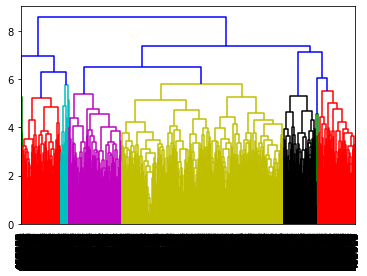

In [64]:
dendrogram(linkage(sdf.values, method='complete'),
             labels = sdf.index,
             leaf_rotation=90,
             leaf_font_size=10)
  
plt.show()

> From this correlation heat graph, it is clear that there are some features which are highly correlated. So PCA would be necessary, in the sense of reducing feature dimensions and reduce noise.

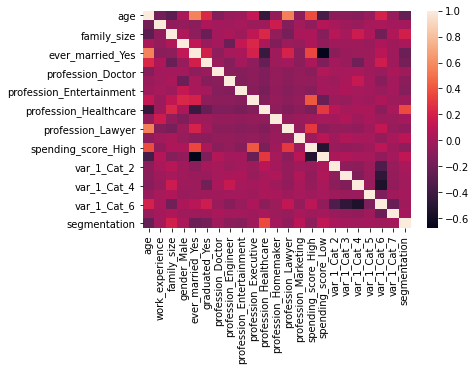

In [66]:
sdfc = sdf.corr()
sns.heatmap(sdfc)

#### PCA + Kmeans

##### PCA

In [67]:
pca = PCA()
pcs = pca.fit_transform(sdf)

> From the explained variance ratio chart below, there is a elbow around 5th components.

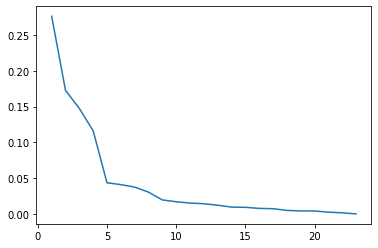

In [68]:
varexp = pca.explained_variance_ratio_
sns.lineplot(range(1, len(varexp)+1), varexp)

> From the cumulative explained variance chart, we can conclude that around 10 components would explain 90% of the variance in the dataset. However, when we use only the 5 components, we can only explain 70% of the variance. 

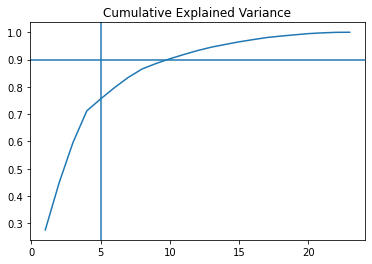

In [76]:
plt.title("Cumulative Explained Variance")
plt.plot(range(1, len(varexp)+1), np.cumsum(varexp))
plt.axvline(5)
plt.axhline(.9)

> From the explained variance plot below, when explained variance = 1, we only have 2 components. 

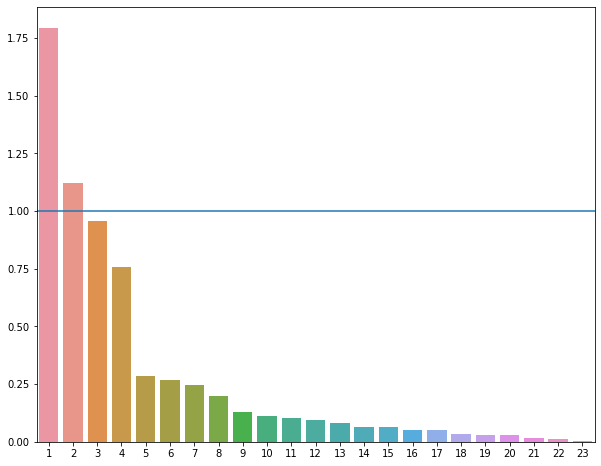

In [72]:
def ev_plot(ev):
  y = list(ev)
  x = list(range(1,len(ev)+1))
  return x, y

ev = pca.explained_variance_

x, y = ev_plot(pca.explained_variance_)

plt.figure(figsize=(10,8))
sns.barplot(x, y)
plt.axhline(1)

> Based on the charts shown above, I would choose only the first 10 components to for I was trying to find a balance points between reducing dimensions and explaining as much variance as possible. 

In [75]:
comps = pca.components_
COLS = ["PC" + str(i) for i in range(1, len(comps)+1)]
loadings = pd.DataFrame(comps.T, columns=COLS, index=sdf.columns)
loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
age,-0.564526,-0.353579,-0.292301,0.436476,0.293482,0.220251,0.285470,-0.096202,0.002664,0.006886,-0.007255,0.016981,-0.013988,0.055313,0.018464,-0.206975,0.001487,0.071317,-0.042920,0.034397,-0.001115,0.001838,0.002065
work_experience,0.109319,0.791614,-0.195963,0.558815,0.060833,-0.003179,0.073825,0.001400,0.011543,-0.000338,-0.001989,0.017793,-0.009196,0.008622,-0.010228,-0.008215,-0.010553,0.013483,0.011028,-0.017901,-0.005918,-0.000005,0.001378
family_size,0.409687,-0.288868,0.617693,0.541461,0.010426,0.235135,0.052319,-0.102614,-0.046444,0.020109,0.033236,0.004621,0.009120,-0.019529,-0.009859,0.026208,0.001559,-0.003687,-0.011929,0.011862,-0.008507,-0.003725,0.001271
gender_Male,0.002111,-0.053200,0.010244,0.043834,-0.511861,-0.413404,0.663237,-0.199841,0.052192,-0.073195,0.117277,0.068373,0.099455,0.177540,-0.054990,0.063969,0.050504,0.017023,-0.038888,0.054370,0.004138,0.007007,0.001603
ever_married_Yes,-0.193477,-0.125889,-0.025031,0.252820,-0.149806,-0.361850,-0.256137,0.068077,-0.250453,0.005445,0.010524,0.459105,-0.051588,-0.424254,0.151915,0.307538,-0.270678,0.089563,-0.057313,0.000106,0.003105,-0.002471,-0.003546


In [78]:
compns = pcs[:, :10]
cdf = pd.DataFrame(compns, columns=['pc1', 'pc2', 'pc3', 'pc4','pc5','pc6','pc7','pc8','pc9','pc10'], index=sdf.index)

##### Kmeans

In [88]:
temp_cdf = cdf.copy()
temp_cdf['segmentation'] = sdf['segmentation']

In [89]:
# use 2 to 10 clusters
KRANGE = range(2,10)

# storage
inertia = []
silo = []

for k in KRANGE:
  km = KMeans(k)
  km.fit(cdf)
  labs = km.predict(cdf)
  inertia.append(km.inertia_)
  silo.append(silhouette_score(cdf, labs))

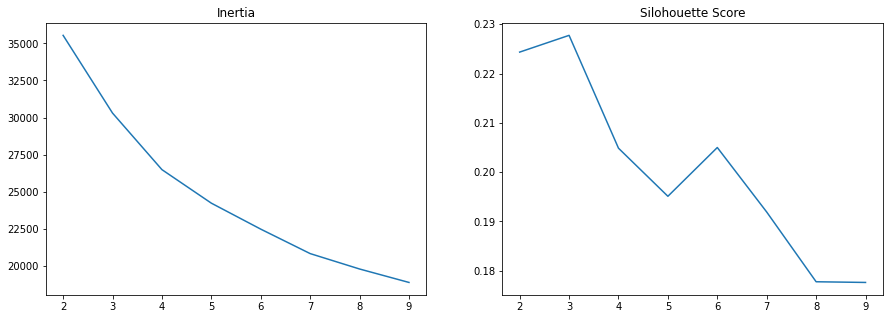

In [90]:
plt.figure(figsize=(15,5))


plt.subplot(1, 2, 1)
plt.title("Inertia")
sns.lineplot(KRANGE, inertia)

plt.subplot(1, 2, 2)
plt.title("Silohouette Score")
sns.lineplot(KRANGE, silo)

plt.show();

In [91]:
k3 = KMeans(3)
k3_labs = k3.fit_predict(cdf)

# metrics
k3_silo = silhouette_score(cdf, k3_labs)
k3_ssamps = silhouette_samples(cdf, k3_labs)
np.unique(k3_labs)

array([0, 1, 2], dtype=int32)

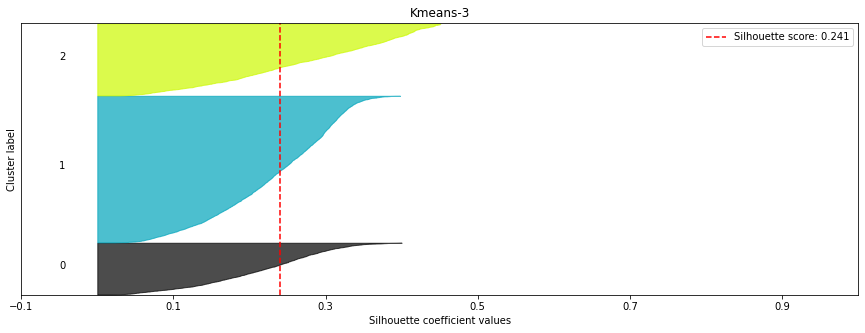

In [116]:
skplt.metrics.plot_silhouette(sdf, k3_labs, title="Kmeans-3", figsize=(15,5))
plt.show()

In [99]:
sdf['k3_labs'] = k3_labs

In [100]:
sdf['k3_labs'].value_counts()

1    4200
2    2054
0    1482
Name: k3_labs, dtype: int64

In [101]:
profile = sdf.groupby('k3_labs').mean()
profile

,age,work_experience,family_size,gender_Male,ever_married_Yes,graduated_Yes,profession_Doctor,profession_Engineer,profession_Entertainment,profession_Executive,profession_Healthcare,profession_Homemaker,profession_Lawyer,profession_Marketing,spending_score_High,spending_score_Low,var_1_Cat_2,var_1_Cat_3,var_1_Cat_4,var_1_Cat_5,var_1_Cat_6,var_1_Cat_7,segmentation
k3_labs,,,,,,,,,,,,,,,,,,,,,,,
0,-0.273627,1.767350,-0.310477,0.482456,0.543860,0.723347,0.091768,0.087719,0.137652,0.064103,0.096491,0.089744,0.020243,0.033738,0.107962,0.649798,0.057355,0.093117,0.095816,0.008097,0.711876,0.022267,1.377868
1,0.528656,-0.482742,-0.216504,0.566667,0.797619,0.739286,0.073333,0.090476,0.131429,0.096905,0.024048,0.017143,0.135714,0.017857,0.220476,0.449762,0.040476,0.092381,0.115000,0.007857,0.705714,0.023333,1.069286
2,-0.883564,-0.288071,0.666720,0.565239,0.182084,0.342259,0.111003,0.081305,0.085200,0.038948,0.505842,0.015093,0.004382,0.076923,0.035540,0.894352,0.075463,0.121714,0.197176,0.018014,0.535054,0.029698,2.685979


>The profile dataset has different scale, so it would be reasonable to scale the data.

In [103]:
profile.describe()

,age,work_experience,family_size,gender_Male,ever_married_Yes,graduated_Yes,profession_Doctor,profession_Engineer,profession_Entertainment,profession_Executive,profession_Healthcare,profession_Homemaker,profession_Lawyer,profession_Marketing,spending_score_High,spending_score_Low,var_1_Cat_2,var_1_Cat_3,var_1_Cat_4,var_1_Cat_5,var_1_Cat_6,var_1_Cat_7,segmentation
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,-0.209512,0.332179,0.046580,0.538120,0.507854,0.601631,0.092035,0.086500,0.118093,0.066652,0.208794,0.040660,0.053446,0.042839,0.121326,0.664637,0.057765,0.102404,0.135998,0.011323,0.650881,0.025100,1.711044
std,0.708290,1.246700,0.539109,0.048212,0.309343,0.224764,0.018836,0.004706,0.028656,0.029062,0.259789,0.042520,0.071686,0.030567,0.093189,0.222666,0.017497,0.016727,0.053844,0.005796,0.100357,0.004018,0.858300
min,-0.883564,-0.482742,-0.310477,0.482456,0.182084,0.342259,0.073333,0.081305,0.085200,0.038948,0.024048,0.015093,0.004382,0.017857,0.035540,0.449762,0.040476,0.092381,0.095816,0.007857,0.535054,0.022267,1.069286
25%,-0.578595,-0.385406,-0.263491,0.523847,0.362972,0.532803,0.082551,0.084512,0.108314,0.051525,0.060269,0.016118,0.012312,0.025798,0.071751,0.549780,0.048916,0.092749,0.105408,0.007977,0.620384,0.022800,1.223577
50%,-0.273627,-0.288071,-0.216504,0.565239,0.543860,0.723347,0.091768,0.087719,0.131429,0.064103,0.096491,0.017143,0.020243,0.033738,0.107962,0.649798,0.057355,0.093117,0.115000,0.008097,0.705714,0.023333,1.377868
75%,0.127515,0.739640,0.225108,0.565953,0.670739,0.731316,0.101385,0.089098,0.134540,0.080504,0.301167,0.053443,0.077979,0.055331,0.164219,0.772075,0.066409,0.107416,0.156088,0.013055,0.708795,0.026516,2.031923
max,0.528656,1.767350,0.666720,0.566667,0.797619,0.739286,0.111003,0.090476,0.137652,0.096905,0.505842,0.089744,0.135714,0.076923,0.220476,0.894352,0.075463,0.121714,0.197176,0.018014,0.711876,0.029698,2.685979


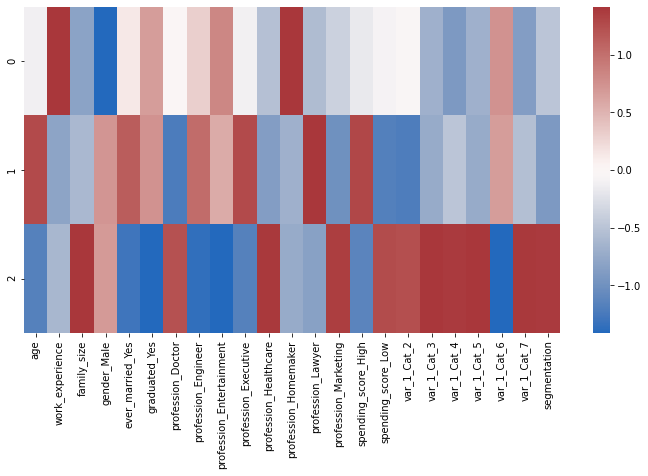

In [104]:
sc = StandardScaler()
profile_scaled = sc.fit_transform(profile)

plt.figure(figsize=(12, 6))
pal = sns.color_palette("vlag", as_cmap=True)
sns.heatmap(profile_scaled, center=0, cmap=pal, xticklabels=profile.columns)

#### TSNE + Kmeans

##### TSNE

In [107]:
tsne = TSNE()
tsne.fit(sdf)

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, n_jobs=None,
     perplexity=30.0, random_state=None, verbose=0)

In [109]:
te = tsne.embedding_
tdata = pd.DataFrame(te, columns=["e1", "e2"], index=sdf.index)
tdata['segmentation'] = sdf['segmentation']
tdata.head()

,e1,e2,segmentation
id,,,
462809,-58.842152,-26.756887,3
462643,-13.788918,-13.168706,0
466315,30.637024,9.881070,1
461735,4.394300,80.183800,1
462669,-4.500636,11.605991,0


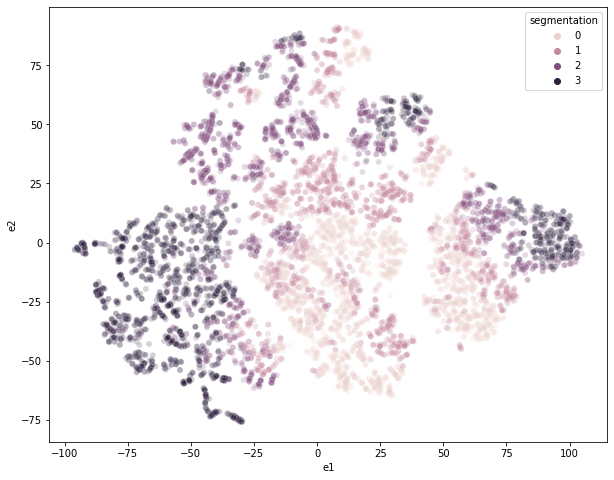

In [110]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x="e1", y="e2", data=tdata, hue='segmentation', alpha=0.2)

##### Kmeans

In [111]:
KRANGE = range(2,10)

# storage
inertia = []
silo = []

for k in KRANGE:
  km = KMeans(k)
  km.fit(tdata)
  labs = km.predict(tdata)
  inertia.append(km.inertia_)
  silo.append(silhouette_score(tdata, labs))

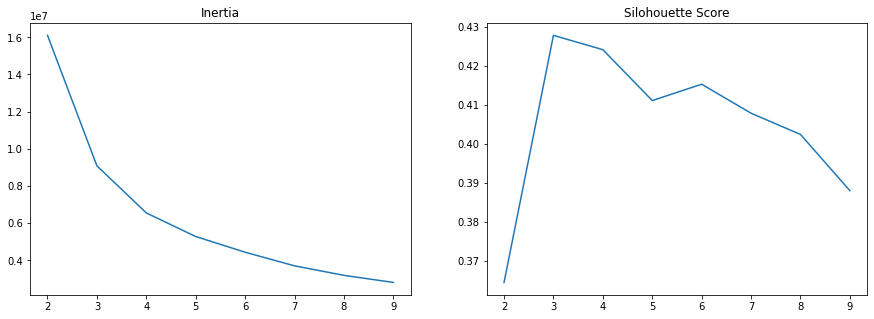

In [112]:
plt.figure(figsize=(15,5))


plt.subplot(1, 2, 1)
plt.title("Inertia")
sns.lineplot(KRANGE, inertia)

plt.subplot(1, 2, 2)
plt.title("Silohouette Score")
sns.lineplot(KRANGE, silo)

plt.show();

In [113]:
# get the model
k3 = KMeans(3)
tk3 = k3.fit_predict(tdata)

# metrics
tk3_s = silhouette_score(tdata, tk3)
tk3_ssamps = silhouette_samples(tdata, tk3)
np.unique(tk3)

array([0, 1, 2], dtype=int32)

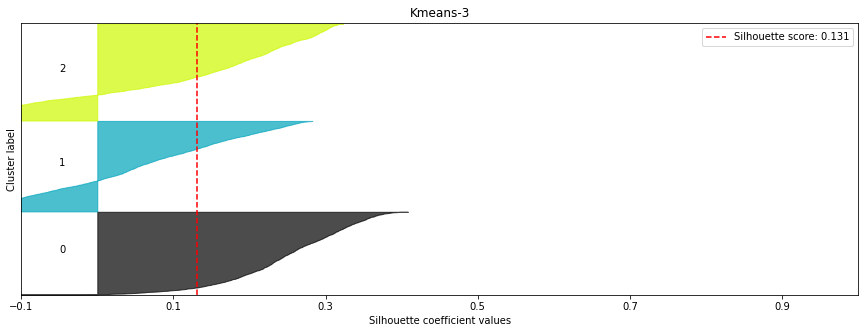

In [115]:
skplt.metrics.plot_silhouette(sdf, tk3, title="Kmeans-3", figsize=(15,5))
plt.show();